<a href="https://colab.research.google.com/github/madhusowmya/madhusowmya.github.io/blob/master/CNN_3_lr_%3D_0_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

Mounted at /content/drive


In [ ]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

In [ ]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

SGD 
parameters: learning rate =0.05, momentum =0.9

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.05, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [ ]:
history_SGD = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 45ms/step - loss: 0.4692 - accuracy: 0.8462 - val_loss: 0.1062 - val_accuracy: 0.9669
Epoch 2/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1454 - accuracy: 0.9552 - val_loss: 0.1103 - val_accuracy: 0.9694
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1115 - accuracy: 0.9652 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 4/15
525/525 [==============================] - 24s 45ms/step - loss: 0.0977 - accuracy: 0.9697 - val_loss: 0.0567 - val_accuracy: 0.9830
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.0520 - val_accuracy: 0.9867
Epoch 6/15
525/525 [==============================] - 23s 44ms/step - loss: 0.0793 - accuracy: 0.9749 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 7/15
525/525 [==============================] - 23s 45ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.0411 - val_accuracy: 0.9881
Epo

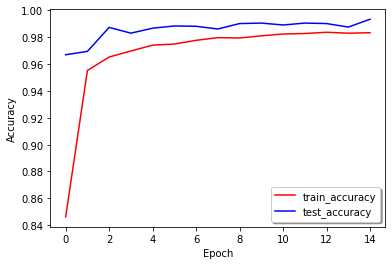

In [ ]:
plt.plot(history_SGD.history['accuracy'], color='r')
plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

RMSProp

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.05, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [ ]:
history_RMS = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.9117 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 28s 53ms/step - loss: 0.5074 - accuracy: 0.8408 - val_loss: 0.2965 - val_accuracy: 0.9270
Epoch 2/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1891 - accuracy: 0.9437 - val_loss: 0.1522 - val_accuracy: 0.9662
Epoch 3/15
525/525 [==============================] - 28s 54ms/step - loss: 0.1539 - accuracy: 0.9555 - val_loss: 0.0934 - val_accuracy: 0.9752
Epoch 4/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1385 - accuracy: 0.9602 - val_loss: 0.1235 - val_accuracy: 0.9731
Epoch 5/15
525/525 [==============================] - 28s 54ms/step - loss: 0.1256 - accuracy: 0.9651 - val_loss: 0.0798 - val_accuracy: 0.9827
Epoch 6/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1158 - accuracy: 0.9672 - val_loss: 0.0967 - val_accuracy: 0.9790
Epoch 7/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1118 - accuracy: 0.9683 - val_loss: 0.1056 - val_accuracy: 0.9806
Epo

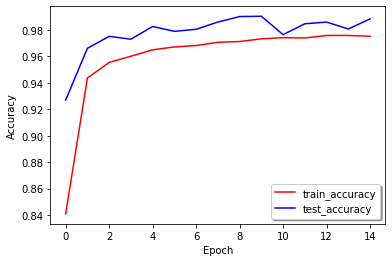

In [ ]:
plt.plot(history_RMS.history['accuracy'], color='r')
plt.plot(history_RMS.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Adam


In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [ ]:
history_Adam = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  3/525 [..............................] - ETA: 12s - loss: 2.6274 - accuracy: 0.1198

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 46ms/step - loss: 0.5350 - accuracy: 0.8242 - val_loss: 0.2006 - val_accuracy: 0.9467
Epoch 2/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1940 - accuracy: 0.9395 - val_loss: 0.1218 - val_accuracy: 0.9665
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1583 - accuracy: 0.9521 - val_loss: 0.1080 - val_accuracy: 0.9662
Epoch 4/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1447 - accuracy: 0.9553 - val_loss: 0.0599 - val_accuracy: 0.9836
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1463 - accuracy: 0.9568 - val_loss: 0.0600 - val_accuracy: 0.9862
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1178 - accuracy: 0.9648 - val_loss: 0.0621 - val_accuracy: 0.9830
Epoch 7/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1183 - accuracy: 0.9647 - val_loss: 0.0427 - val_accuracy: 0.9877
Epo

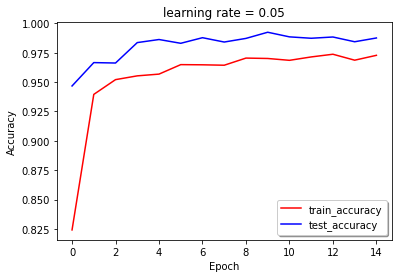

In [ ]:
plt.plot(history_Adam.history['accuracy'], color='r')
plt.plot(history_Adam.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('learning rate = 0.05')
plt.show()


Adamax

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
             
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0285 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 47ms/step - loss: 0.5406 - accuracy: 0.8227 - val_loss: 0.0760 - val_accuracy: 0.9786
Epoch 2/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1722 - accuracy: 0.9469 - val_loss: 0.0822 - val_accuracy: 0.9761
Epoch 3/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1362 - accuracy: 0.9579 - val_loss: 0.0872 - val_accuracy: 0.9745
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1155 - accuracy: 0.9643 - val_loss: 0.1781 - val_accuracy: 0.9471
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1032 - accuracy: 0.9684 - val_loss: 0.0816 - val_accuracy: 0.9760
Epoch 6/15
525/525 [==============================] - 24s 45ms/step - loss: 0.0996 - accuracy: 0.9689 - val_loss: 0.0433 - val_accuracy: 0.9862
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0919 - accuracy: 0.9718 - val_loss: 0.0613 - val_accuracy: 0.9839
Epo

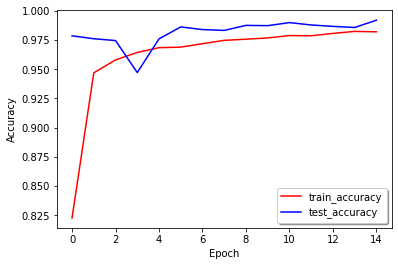

In [ ]:
plt.plot(history_Adamax.history['accuracy'], color='r')
plt.plot(history_Adamax.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


AdaGrad


In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.05,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 13s - loss: 2.7988 - accuracy: 0.1146

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 47ms/step - loss: 0.3701 - accuracy: 0.8834 - val_loss: 0.0753 - val_accuracy: 0.9767
Epoch 2/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1310 - accuracy: 0.9593 - val_loss: 0.0559 - val_accuracy: 0.9823
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1020 - accuracy: 0.9681 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 4/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0882 - accuracy: 0.9726 - val_loss: 0.0635 - val_accuracy: 0.9804
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0775 - accuracy: 0.9753 - val_loss: 0.0351 - val_accuracy: 0.9889
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0694 - accuracy: 0.9793 - val_loss: 0.0414 - val_accuracy: 0.9874
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.0342 - val_accuracy: 0.9906
Epo

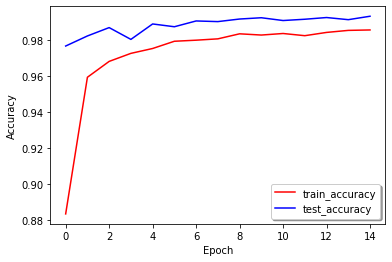

In [ ]:
plt.plot(history_Adagrad.history['accuracy'], color='r')
plt.plot(history_Adagrad.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Adadelta

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.05, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0082 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 46ms/step - loss: 1.2947 - accuracy: 0.5772 - val_loss: 0.2506 - val_accuracy: 0.9449
Epoch 2/15
525/525 [==============================] - 24s 46ms/step - loss: 0.5107 - accuracy: 0.8447 - val_loss: 0.1399 - val_accuracy: 0.9637
Epoch 3/15
525/525 [==============================] - 24s 46ms/step - loss: 0.3447 - accuracy: 0.8964 - val_loss: 0.0983 - val_accuracy: 0.9733
Epoch 4/15
525/525 [==============================] - 24s 46ms/step - loss: 0.2642 - accuracy: 0.9196 - val_loss: 0.0903 - val_accuracy: 0.9742
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.2225 - accuracy: 0.9337 - val_loss: 0.0758 - val_accuracy: 0.9781
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1900 - accuracy: 0.9437 - val_loss: 0.0696 - val_accuracy: 0.9798
Epoch 7/15
525/525 [==============================] - 24s 47ms/step - loss: 0.1711 - accuracy: 0.9488 - val_loss: 0.0617 - val_accuracy: 0.9823
Epo

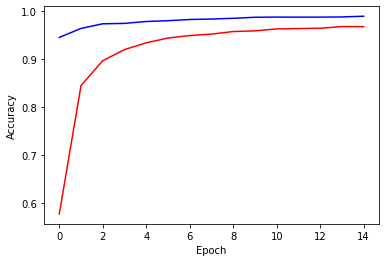

In [ ]:
plt.plot(history_Adadelta.history['accuracy'], color='r')
plt.plot(history_Adadelta.history['val_accuracy'], color='b')
#plt.legend(('train_accuracy','test_accuracy'),loc = 'lower right',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


NAdam

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.05,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  2/525 [..............................] - ETA: 14s - loss: 2.8547 - accuracy: 0.1719

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 30s 58ms/step - loss: 0.4188 - accuracy: 0.8641 - val_loss: 0.4394 - val_accuracy: 0.8895
Epoch 2/15
525/525 [==============================] - 30s 57ms/step - loss: 0.1748 - accuracy: 0.9470 - val_loss: 0.0644 - val_accuracy: 0.9818
Epoch 3/15
525/525 [==============================] - 30s 57ms/step - loss: 0.1365 - accuracy: 0.9575 - val_loss: 0.1253 - val_accuracy: 0.9642
Epoch 4/15
525/525 [==============================] - 31s 60ms/step - loss: 0.1233 - accuracy: 0.9639 - val_loss: 0.0702 - val_accuracy: 0.9819
Epoch 5/15
525/525 [==============================] - 31s 58ms/step - loss: 0.1163 - accuracy: 0.9649 - val_loss: 0.0508 - val_accuracy: 0.9857
Epoch 6/15
525/525 [==============================] - 30s 58ms/step - loss: 0.1059 - accuracy: 0.9687 - val_loss: 0.0434 - val_accuracy: 0.9886
Epoch 7/15
525/525 [==============================] - 31s 59ms/step - loss: 0.1004 - accuracy: 0.9716 - val_loss: 0.0690 - val_accuracy: 0.9835
Epo

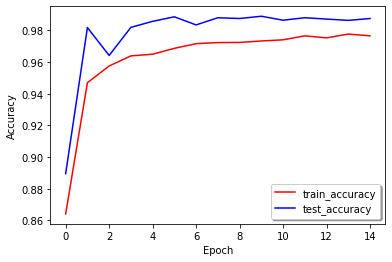

In [ ]:
plt.plot(history_NAdam.history['accuracy'], color='r')
plt.plot(history_NAdam.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'lower right',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


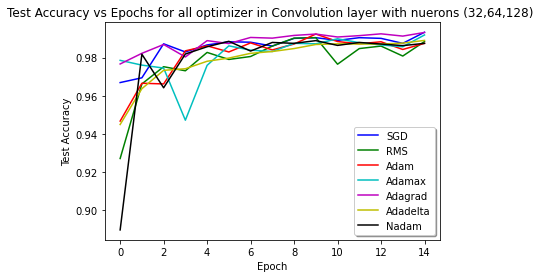

In [ ]:
plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.plot(history_RMS.history['val_accuracy'], color='g')
plt.plot(history_Adam.history['val_accuracy'], color='r')
plt.plot(history_Adamax.history['val_accuracy'], color='c')
plt.plot(history_Adagrad.history['val_accuracy'], color='m')
plt.plot(history_Adadelta.history['val_accuracy'], color='y')
plt.plot(history_NAdam.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.title('Test Accuracy vs Epochs for all optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()
# fig , ax = plt.subplots()
# y1 = history_SGD.history['val_accuracy']
# y2 = history_RMS.history['val_accuracy']
# y3 = history_Adam.history['val_accuracy']
# y4 = history_Adamax.history['val_accuracy']
# y5 = history_Adagrad.history['val_accuracy']
# y6 = history_Adadelta.history['val_accuracy']
# y7 = history_NAdam.history['val_accuracy']
# x = np.arange(start=1, stop=16, step=1)
# plt.ylim(0.0,1.1)
# plt.plot(x, y1, y2, y3, y4, y5, y6,y7)
# plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
# plt.ylabel('Test Accuracy')
# plt.xlabel('Epoch')
# plt.title('Test Accuracy for')
# plt.show()


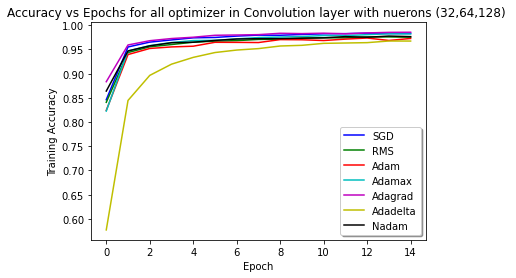

In [ ]:
plt.plot(history_SGD.history['accuracy'], color='b')
plt.plot(history_RMS.history['accuracy'], color='g')
plt.plot(history_Adam.history['accuracy'], color='r')
plt.plot(history_Adamax.history['accuracy'], color='c')
plt.plot(history_Adagrad.history['accuracy'], color='m')
plt.plot(history_Adadelta.history['accuracy'], color='y')
plt.plot(history_NAdam.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.title('Accuracy vs Epochs for all optimizer in Convolution layer with nuerons (32,64,128) ')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()



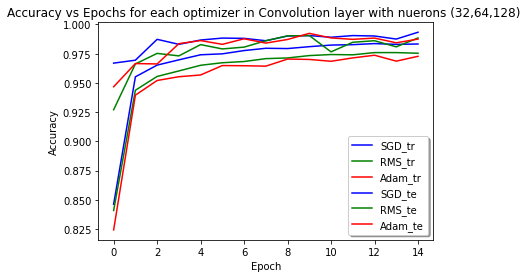

In [ ]:
plt.plot(history_SGD.history['accuracy'], color='b')
plt.plot(history_RMS.history['accuracy'], color='g')
plt.plot(history_Adam.history['accuracy'], color='r')

plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.plot(history_RMS.history['val_accuracy'], color='g')
plt.plot(history_Adam.history['val_accuracy'], color='r')


plt.legend(('SGD_tr','RMS_tr','Adam_tr','SGD_te','RMS_te','Adam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()

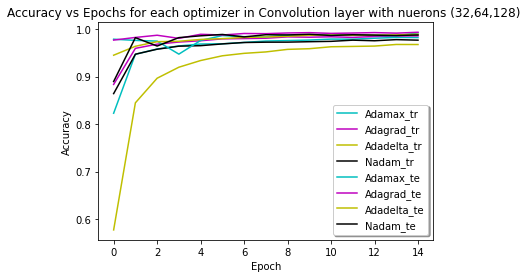

In [ ]:
plt.plot(history_Adamax.history['accuracy'], color='c')
plt.plot(history_Adagrad.history['accuracy'], color='m')
plt.plot(history_Adadelta.history['accuracy'], color='y')
plt.plot(history_NAdam.history['accuracy'], color='k')
plt.plot(history_Adamax.history['val_accuracy'], color='c')
plt.plot(history_Adagrad.history['val_accuracy'], color='m')
plt.plot(history_Adadelta.history['val_accuracy'], color='y')
plt.plot(history_NAdam.history['val_accuracy'], color='k')
plt.legend(('Adamax_tr','Adagrad_tr','Adadelta_tr','Nadam_tr','Adamax_te','Adagrad_te','Adadelta_te','Nadam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()